# Data 

In [74]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import window_make
import Gradient
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [75]:
data = pd.read_csv('archive.csv') # co2 data

data.head()

,Year,Month,Decimal Date,Carbon Dioxide (ppm),Seasonally Adjusted CO2 (ppm),Carbon Dioxide Fit (ppm),Seasonally Adjusted CO2 Fit (ppm)
0,1958,1,1958.0411,NaN,NaN,NaN,NaN
1,1958,2,1958.1260,NaN,NaN,NaN,NaN
2,1958,3,1958.2027,315.69,314.42,316.18,314.89
3,1958,4,1958.2877,317.45,315.15,317.30,314.98
4,1958,5,1958.3699,317.50,314.73,317.83,315.06


In [76]:
data = data.to_numpy()

co2 = data[:,3]

Text(0.5, 0, 'time series')

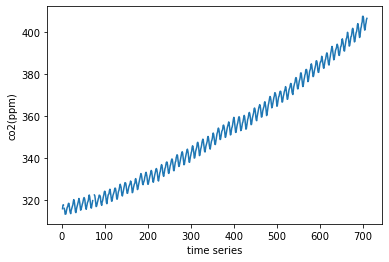

In [77]:
plt.plot(co2)
plt.ylabel('co2(ppm)')
plt.xlabel('time series')

In [78]:
X_i,Y_i = window_make.dowlist(co2,1)

In [79]:
X_train, X_test, Y_train, Y_test = train_test_split(X_i, Y_i, test_size=0.2, random_state=1)


scaler = MinMaxScaler()
scaler.fit(X_train)
x_scale = scaler.transform(X_train) # scaling train data
x_test = scaler.transform(X_test) # scaling test data using train data mean and std 




print(x_scale[:5])

poly = PolynomialFeatures(5)
x_train = poly.fit_transform(x_scale)
x_test = poly.fit_transform(x_test)
print(x_train[:5])

[[0.84392015]
 [0.06469521]
 [0.0240205 ]
 [0.49236682]
 [0.44934344]]
[[1.00000000e+00 8.43920145e-01 7.12201211e-01 6.01040950e-01
  5.07230566e-01 4.28062093e-01]
 [1.00000000e+00 6.46952066e-02 4.18546975e-03 2.70779830e-04
  1.75181571e-05 1.13334079e-06]
 [1.00000000e+00 2.40204975e-02 5.76984300e-04 1.38594499e-05
  3.32910882e-07 7.99668501e-09]
 [1.00000000e+00 4.92366820e-01 2.42425085e-01 1.19362068e-01
  5.87699219e-02 2.89363595e-02]
 [1.00000000e+00 4.49343440e-01 2.01909527e-01 9.07267213e-02
  4.07674570e-02 1.83185894e-02]]


In [80]:
print(x_train.shape)
print(x_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(559, 6)
(140, 6)
(559, 1)
(140, 1)


# Momentum method

In [81]:
from sklearn.metrics import mean_squared_error





In [82]:
loss_history_momentum,w = Gradient.momentum_gradient(x_train,Y_train,lr=0.0001, epoch=5000, batch_size=128,gamma=0.9)

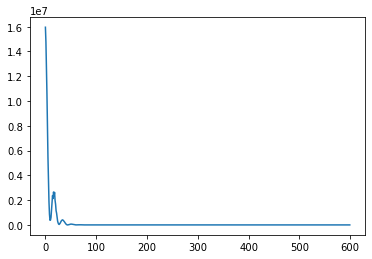

In [83]:
plt.plot(range(len(loss_history_momentum))[:600],loss_history_momentum[:600])

In [84]:
"rmse is ",np.sqrt(loss_history_momentum[-10:-1])

('rmse is ',
 array([15.2026034 , 15.39132807, 14.73468837, 14.89795876, 13.84046281,
        14.08994308, 13.58942942, 13.51833697, 13.73820797]))

# Nestrov Accelerated Gradient

## $\gamma = 0.9$

In [85]:
from sklearn.metrics import mean_squared_error

In [89]:
loss_history_nag,w = Gradient.nestrov_gradient(x_train,Y_train,lr=0.0001, epoch=5000, batch_size=128,gamma=0.9) 


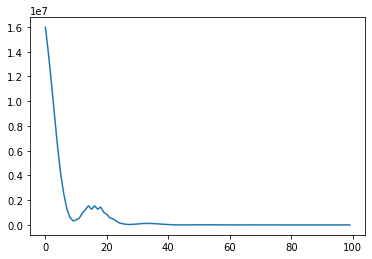

In [90]:
plt.plot(range(len(loss_history_nag[:100])),loss_history_nag[:100])

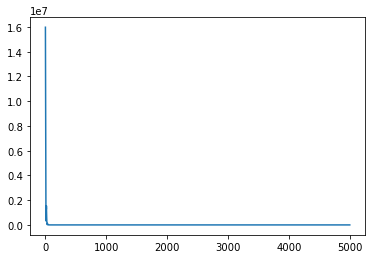

In [91]:
plt.plot(range(len(loss_history_nag)),loss_history_nag)

In [92]:
print("rmse is ",np.sqrt(loss_history_nag[-10:-1]))

rmse is  [15.18848665 15.37676377 14.73502491 14.88530708 13.82962464 14.0759787
 13.59296472 13.51289388 13.72487352]


# Parameter Change 

## Momentum Method

In [60]:
import time
lr_set = [0.00001, 0.0001, 0.001]
batch_set = [32, 64, 128, 256]
epoch_size = 1500
gamma_list = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8]
rmse = np.zeros((len(lr_set), len(batch_set),len(gamma_list)))
time_record = np.zeros((len(lr_set),len(batch_set),len(gamma_list)))

for i in range(len(lr_set)):
    
    hyper = lr_set[i]
    
    for j in range(len(batch_set)):
        
        for k in range(len(gamma_list)):
            batch = batch_set[j]
        
            start = time.time()
            loss, w_conv = Gradient.momentum_gradient(x_train, Y_train, lr=hyper, epoch=epoch_size, batch_size=batch,gamma=gamma_list[k])
            time_cal = time.time() - start
        
            time_record[i,j,k] = time_cal
            Y_pred = np.matmul(x_test,w_conv.reshape((6,-1))) 
            rmse[i,j,k] = mean_squared_error(Y_test, Y_pred)
            print("learning_rate = ", hyper)
            print("batch_size = ", batch)
        
        

learning_rate =  1e-05
batch_size =  32
learning_rate =  1e-05
batch_size =  32
learning_rate =  1e-05
batch_size =  32
learning_rate =  1e-05
batch_size =  32
learning_rate =  1e-05
batch_size =  32
learning_rate =  1e-05
batch_size =  32
learning_rate =  1e-05
batch_size =  32
learning_rate =  1e-05
batch_size =  32
learning_rate =  1e-05
batch_size =  64
learning_rate =  1e-05
batch_size =  64
learning_rate =  1e-05
batch_size =  64
learning_rate =  1e-05
batch_size =  64
learning_rate =  1e-05
batch_size =  64
learning_rate =  1e-05
batch_size =  64
learning_rate =  1e-05
batch_size =  64
learning_rate =  1e-05
batch_size =  64
learning_rate =  1e-05
batch_size =  128
learning_rate =  1e-05
batch_size =  128
learning_rate =  1e-05
batch_size =  128
learning_rate =  1e-05
batch_size =  128
learning_rate =  1e-05
batch_size =  128
learning_rate =  1e-05
batch_size =  128
learning_rate =  1e-05
batch_size =  128
learning_rate =  1e-05
batch_size =  128
learning_rate =  1e-05
batch_siz

In [61]:
rmse

array([[[9.38613226e+03, 7.17933515e+03, 5.25176462e+03, 3.63703120e+03,
         2.48349392e+03, 1.66214515e+03, 1.12582960e+03, 6.00981301e+02],
        [1.98894023e+03, 1.63372603e+03, 1.35658483e+03, 1.10391537e+03,
         8.51422939e+02, 5.84332665e+02, 3.06635008e+02, 8.45953767e+01],
        [7.18753945e+02, 5.72761496e+02, 4.33525353e+02, 3.01863139e+02,
         1.79866778e+02, 8.20001616e+01, 2.33983798e+01, 3.63236033e+00],
        [1.24650344e+02, 8.02111301e+01, 4.56988843e+01, 2.27077173e+01,
         9.30803540e+00, 3.52075661e+00, 2.30704877e+00, 2.22495570e+00]],

       [[5.93346997e+01, 3.57906400e+01, 1.87834581e+01, 8.76647168e+00,
         4.02694175e+00, 2.56027445e+00, 2.24923043e+00, 2.11560290e+00],
        [2.81868219e+00, 2.47203159e+00, 2.32976347e+00, 2.30371871e+00,
         2.20433026e+00, 2.17767804e+00, 2.09158335e+00, 2.01565303e+00],
        [2.21695730e+00, 2.24005962e+00, 2.18493382e+00, 2.12877334e+00,
         2.07038072e+00, 2.02061534e+00, 1.

In [62]:
np.min(rmse)

1.5298772262049771

In [71]:
Best_Parameter[0][0]

2

In [105]:
Best_Parameter = np.where(rmse==np.min(rmse))
print("Learning Rate",lr_set[Best_Parameter[0][0]])
print("batch size",batch_set[Best_Parameter[1][0]])
print("gamma",gamma_list[Best_Parameter[2][0]])
print("Minimum rmse is",np.min(rmse))

Learning Rate 0.001
batch size 256
gamma 0.8
Minimum rmse is 1.5298772262049771


## Nestrov Accelerated Gradient

In [99]:
import time
lr_set = [0.00001, 0.0001, 0.001]
batch_set = [32, 64, 128, 256]
epoch_size = 1500
gamma_list = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8]
rmse_nag = np.zeros((len(lr_set), len(batch_set),len(gamma_list)))
time_record_nag = np.zeros((len(lr_set),len(batch_set),len(gamma_list)))

for i in range(len(lr_set)):
    
    hyper = lr_set[i]
    
    for j in range(len(batch_set)):
        
        for k in range(len(gamma_list)):
            batch = batch_set[j]
        
            start = time.time()
            loss, w_conv = Gradient.nestrov_gradient(x_train, Y_train, lr=hyper, epoch=epoch_size, batch_size=batch,gamma=gamma_list[k])
            time_cal = time.time() - start
        
            time_record_nag[i,j,k] = time_cal
            Y_pred = np.matmul(x_test,w_conv.reshape((6,-1))) 
            rmse_nag[i,j,k] = mean_squared_error(Y_test, Y_pred)
            print("learning_rate = ", hyper)
            print("batch_size = ", batch)
        
        

learning_rate =  1e-05
batch_size =  32
learning_rate =  1e-05
batch_size =  32
learning_rate =  1e-05
batch_size =  32
learning_rate =  1e-05
batch_size =  32
learning_rate =  1e-05
batch_size =  32
learning_rate =  1e-05
batch_size =  32
learning_rate =  1e-05
batch_size =  32
learning_rate =  1e-05
batch_size =  32
learning_rate =  1e-05
batch_size =  64
learning_rate =  1e-05
batch_size =  64
learning_rate =  1e-05
batch_size =  64
learning_rate =  1e-05
batch_size =  64
learning_rate =  1e-05
batch_size =  64
learning_rate =  1e-05
batch_size =  64
learning_rate =  1e-05
batch_size =  64
learning_rate =  1e-05
batch_size =  64
learning_rate =  1e-05
batch_size =  128
learning_rate =  1e-05
batch_size =  128
learning_rate =  1e-05
batch_size =  128
learning_rate =  1e-05
batch_size =  128
learning_rate =  1e-05
batch_size =  128
learning_rate =  1e-05
batch_size =  128
learning_rate =  1e-05
batch_size =  128
learning_rate =  1e-05
batch_size =  128
learning_rate =  1e-05
batch_siz

In [102]:
rmse_nag

array([[[9.43454015e+03, 7.19621534e+03, 5.23806784e+03, 3.65339452e+03,
         2.46892796e+03, 1.67138821e+03, 1.12918797e+03, 6.01205708e+02],
        [1.99302982e+03, 1.65690926e+03, 1.36458522e+03, 1.10207909e+03,
         8.48432097e+02, 5.78597481e+02, 3.08495322e+02, 8.41064673e+01],
        [7.12298189e+02, 5.69723727e+02, 4.39540147e+02, 2.99691921e+02,
         1.79265671e+02, 8.22099835e+01, 2.36447373e+01, 3.68898800e+00],
        [1.23473311e+02, 7.98051620e+01, 4.61827775e+01, 2.26734936e+01,
         9.16725223e+00, 3.54271983e+00, 2.35884054e+00, 2.25916761e+00]],

       [[5.99718326e+01, 3.56356118e+01, 1.90891465e+01, 8.86331569e+00,
         3.97981121e+00, 2.43834826e+00, 2.23740809e+00, 2.11877061e+00],
        [2.91758129e+00, 2.41693187e+00, 2.41602271e+00, 2.31183051e+00,
         2.25361685e+00, 2.18912417e+00, 2.04965966e+00, 1.99547642e+00],
        [2.27100029e+00, 2.18742901e+00, 2.12628748e+00, 2.08614154e+00,
         2.05638088e+00, 2.03551127e+00, 1.

In [104]:
Best_Parameter = np.where(rmse_nag==np.min(rmse_nag))
print("Learninmomentum_gradientate",lr_set[Best_Parameter[0][0]])
print("batch size",batch_set[Best_Parameter[1][0]])
print("gamma",gamma_list[Best_Parameter[2][0]])
print("Minimum rmse is",np.min(rmse_nag))

Learning Rate 0.001
batch size 256
gamma 0.8
Minimum rmse is 1.5180114126228013


# Comapring Algorithms

* lr :  0.001
* gamma : 0.8
* batch size : 256

In [111]:
rmse_sgd_l = []
for i in range(100):
    loss, w_conv = Gradient.stochastic_gradient(x_train, Y_train, lr=0.001, epoch=1500, batch_size=256)
    Y_pred = np.matmul(x_test,w_conv.reshape((6,-1))) 
    rmse_sgd_temp = mean_squared_error(Y_test, Y_pred)
    rmse_sgd_l.append(rmse_sgd_temp)

In [107]:
rmse_nag_l = []

for i in range(100):
    loss, w_conv = Gradient.nestrov_gradient(x_train, Y_train, lr=0.001, epoch=1500, batch_size=256,gamma=0.8)
    Y_pred = np.matmul(x_test,w_conv.reshape((6,-1))) 
    rmse_nag_temp = mean_squared_error(Y_test, Y_pred)
    rmse_nag_l.append(rmse_nag_temp)
    
    

In [110]:
rmse_moment_l = []
for i in range(100):
    loss, w_conv = Gradient.momentum_gradient(x_train, Y_train, lr=0.001, epoch=1500, batch_size=256,gamma=0.8)
    Y_pred = np.matmul(x_test,w_conv.reshape((6,-1))) 
    rmse_moment_temp = mean_squared_error(Y_test, Y_pred)
    rmse_moment_l.append(rmse_moment_temp)
    del loss
    del w_conv
    del rmse_moment_temp
    

([<matplotlib.axis.XTick at 0x7ff3dcdece20>,
 [Text(1, 0, 'SGD'), Text(2, 0, 'Momentum'), Text(3, 0, 'NAG')])

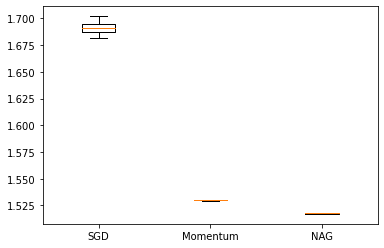

In [121]:
plt.boxplot([rmse_sgd_l,rmse_moment_l,rmse_nag_l])
plt.xticks([1, 2,3],  ['SGD', 'Momentum','NAG'])
